## 1. Load and inspect datasets (handles unnamed index column)

In [37]:
import pandas as pd

# --- Military Compensation ---
comp = pd.read_csv("Military_Compensation.csv", parse_dates=["date"], index_col="date")

# --- Geopolitical Factors ---
geo = pd.read_csv("Geo_Factors.csv", parse_dates=["date"], index_col="date")

# --- Economic Factors ---
eco = pd.read_csv("Eco_Factors.csv", parse_dates=True, index_col=0)  # unnamed index = first column
eco.index.name = "date"  # explicitly name the index

# --- Inspect all three ---
print("=== Military Compensation ===")
print(comp.info(), "\n")
print(comp.head(), "\n")

print("=== Geopolitical Factors ===")
print(geo.info(), "\n")
print(geo.head(), "\n")

print("=== Economic Factors ===")
print(eco.info(), "\n")
print(eco.head())

=== Military Compensation ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1993-03-31 to 2025-06-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   military_comp  130 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None 

            military_comp
date                     
1993-03-31         76.610
1993-06-30         75.756
1993-09-30         74.416
1993-12-31         73.552
1994-03-31         73.021 

=== Geopolitical Factors ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1993-03-31 to 2025-06-30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   military_comp    130 non-null    float64
 1   geo_risk         130 non-null    float64
 2   geo_threats      130 non-null    float64
 3   geo_acts         130 non-null    float64
 4   geo_risk_china   130 non-null    float64
 5   geo_r

## 2. Compare time ranges

=== Time Range Summary ===
Military Compensation: 1993-03-31 → 2025-06-30 (130 obs)
Geopolitical Factors: 1993-03-31 → 2025-06-30 (130 obs)
Economic Factors: 1993-03-31 → 2025-06-30 (130 obs)


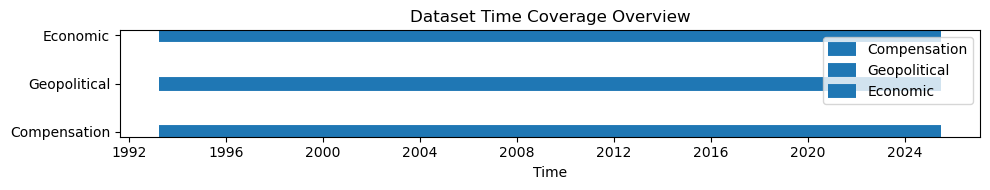

In [38]:
import matplotlib.pyplot as plt

# --- 1. Display time coverage summary ---
print("=== Time Range Summary ===")
for name, df in zip(["Military Compensation", "Geopolitical Factors", "Economic Factors"],
                    [comp, geo, eco]):
    print(f"{name}: {df.index.min().date()} → {df.index.max().date()} ({len(df)} obs)")

# --- 2. Visual timeline comparison ---
plt.figure(figsize=(10, 2))
datasets = {"Compensation": comp, "Geopolitical": geo, "Economic": eco}

for i, (name, df) in enumerate(datasets.items()):
    plt.hlines(y=i, xmin=df.index.min(), xmax=df.index.max(), linewidth=10, label=name)

plt.yticks(range(len(datasets)), list(datasets.keys()))
plt.xlabel("Time")
plt.title("Dataset Time Coverage Overview")
plt.legend()
plt.tight_layout()
plt.show()

## 3. Target and Comparative Exploration

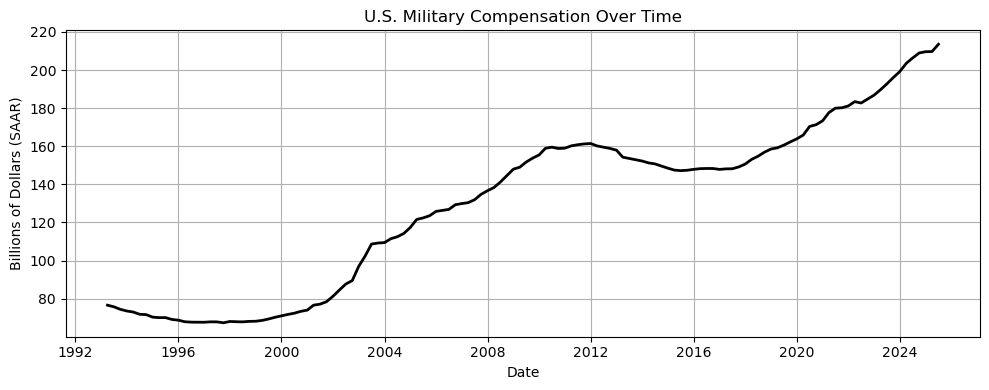

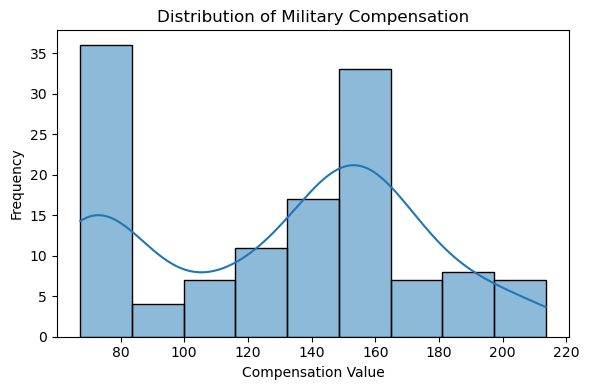

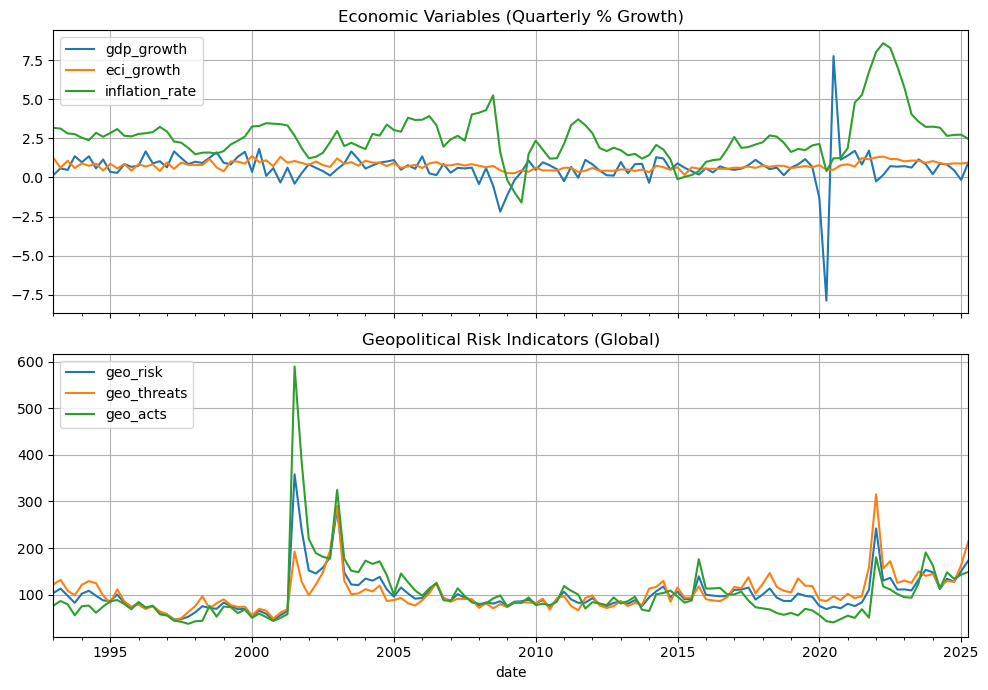

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Inspect Target Variable ---
plt.figure(figsize=(10, 4))
plt.plot(comp.index, comp['military_comp'], color='black', lw=2)
plt.title("U.S. Military Compensation Over Time")
plt.xlabel("Date")
plt.ylabel("Billions of Dollars (SAAR)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2️⃣ Distribution of Military Compensation ---
plt.figure(figsize=(6, 4))
sns.histplot(comp['military_comp'], kde=True, color='tab:blue')
plt.title("Distribution of Military Compensation")
plt.xlabel("Compensation Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 3️⃣ Compare Economic and Geopolitical Variables ---
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

eco[['gdp_growth', 'eci_growth', 'inflation_rate']].plot(ax=axes[0], lw=1.5)
axes[0].set_title("Economic Variables (Quarterly % Growth)")
axes[0].legend(loc='upper left')
axes[0].grid(True)

geo[['geo_risk', 'geo_threats', 'geo_acts']].plot(ax=axes[1], lw=1.5)
axes[1].set_title("Geopolitical Risk Indicators (Global)")
axes[1].legend(loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Correlation analysis

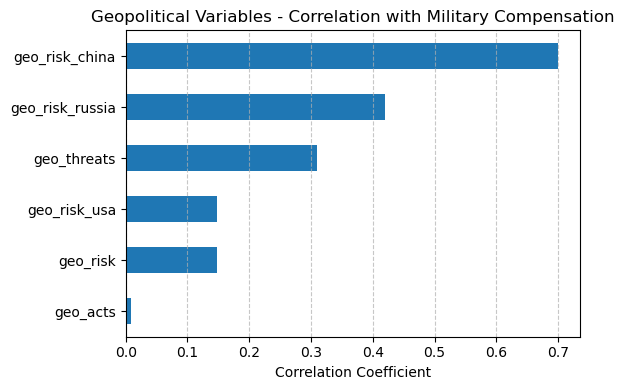

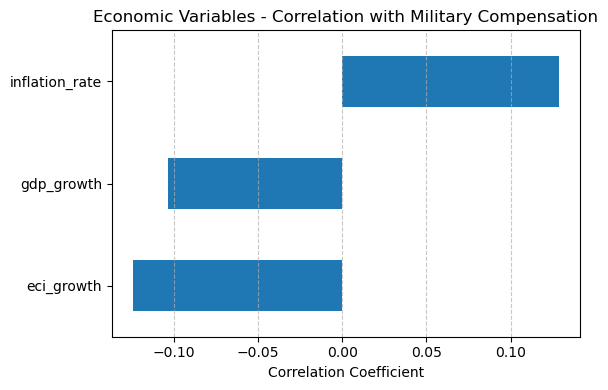

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Ensure numeric-only data ---
geo_num = geo.select_dtypes(include="number")
eco_num = eco.select_dtypes(include="number")

# --- Helper function for plotting ---
def plot_corr_heatbar(df, title_prefix):
    corr = df.corr()

    # Bar plot: correlations with military_comp
    if 'military_comp' in df.columns:
        target_corr = corr['military_comp'].drop('military_comp')
        plt.figure(figsize=(6, 4))
        target_corr.sort_values().plot(kind='barh', color='tab:blue')
        plt.title(f"{title_prefix} - Correlation with Military Compensation")
        plt.xlabel("Correlation Coefficient")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# --- GEO correlations ---
plot_corr_heatbar(geo_num, "Geopolitical Variables")

# --- ECON correlations ---
plot_corr_heatbar(eco_num, "Economic Variables")

# Rolling Correlation

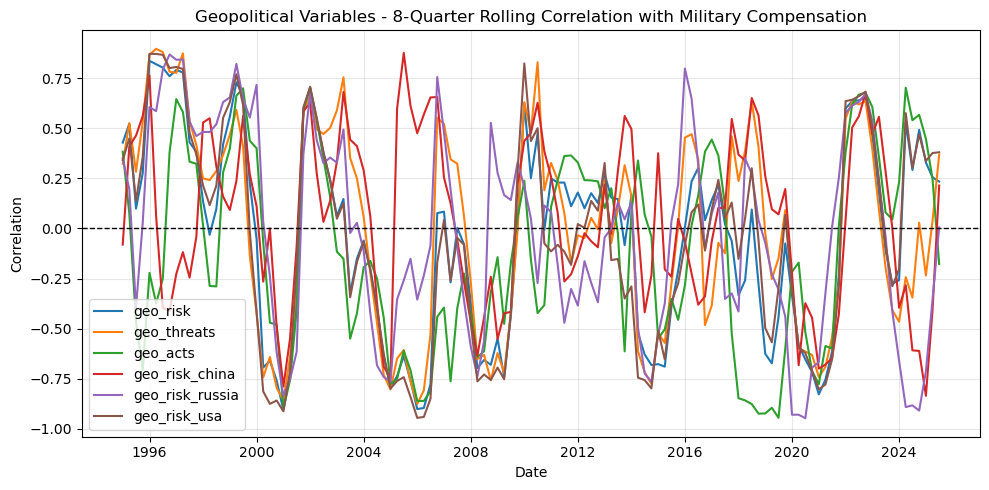

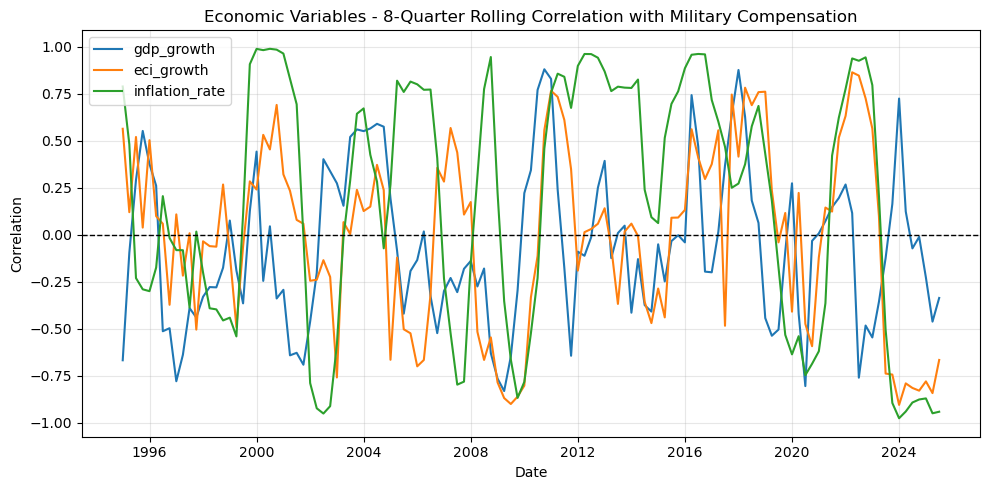

In [41]:
import matplotlib.pyplot as plt

# --- Parameters ---
window = 8  # roughly 2 years if quarterly data

def plot_rolling_corr(df, title_prefix, target='military_comp', window=8):
    if target not in df.columns:
        print(f"⚠️ '{target}' not found in {title_prefix} dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    for col in df.columns:
        if col != target:
            rolling_corr = df[target].rolling(window).corr(df[col])
            plt.plot(rolling_corr, label=col)
    
    plt.title(f"{title_prefix} - {window}-Quarter Rolling Correlation with Military Compensation")
    plt.xlabel("Date")
    plt.ylabel("Correlation")
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- GEO rolling correlations ---
plot_rolling_corr(geo_num, "Geopolitical Variables", window=8)

# --- ECON rolling correlations ---
plot_rolling_corr(eco_num, "Economic Variables", window=8)

# Rolling means and volatility

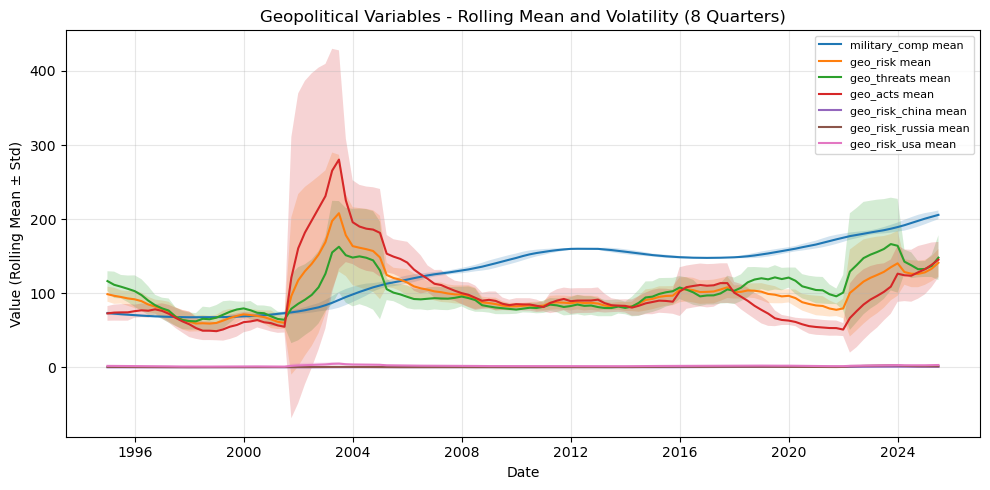

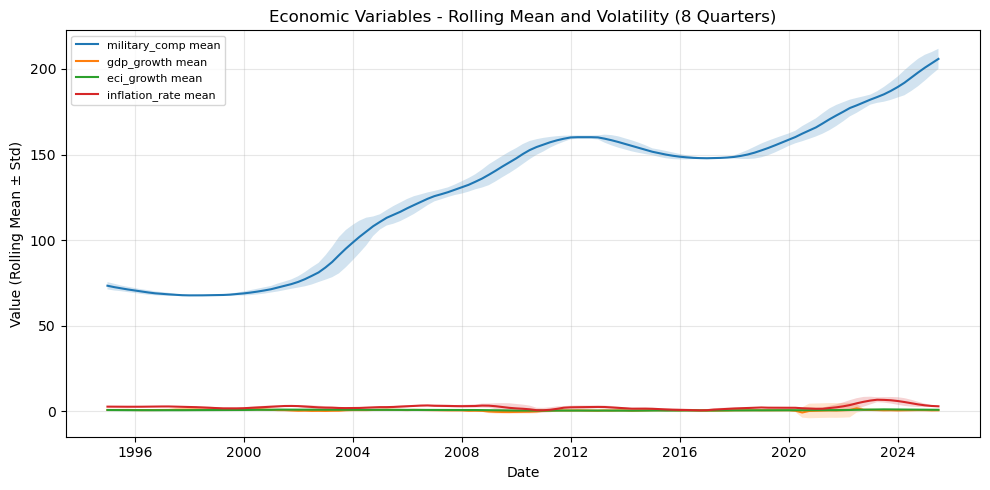

In [42]:
import matplotlib.pyplot as plt

def plot_rolling_stats(df, title_prefix, target='military_comp', window=8):
    plt.figure(figsize=(10, 5))
    plt.title(f"{title_prefix} - Rolling Mean and Volatility ({window} Quarters)")
    
    for col in df.columns:
        roll_mean = df[col].rolling(window).mean()
        roll_std = df[col].rolling(window).std()
        plt.plot(roll_mean, label=f"{col} mean", linewidth=1.5)
        plt.fill_between(df.index, roll_mean - roll_std, roll_mean + roll_std, alpha=0.2)
    
    plt.xlabel("Date")
    plt.ylabel("Value (Rolling Mean ± Std)")
    plt.legend(loc='best', fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- GEO: Rolling mean + volatility ---
plot_rolling_stats(geo_num, "Geopolitical Variables", window=8)

# --- ECON: Rolling mean + volatility ---
plot_rolling_stats(eco_num, "Economic Variables", window=8)

# Stationarity

In [43]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    series = series.dropna()
    result = adfuller(series)
    p_value = result[1]
    status = "Stationary ✅" if p_value < 0.05 else "Non-stationary ⚠️"
    print(f"{name}: ADF p-value = {p_value:.4f} → {status}")

def run_adf_tests(df, title_prefix):
    print(f"\n=== {title_prefix} ===")
    for col in df.columns:
        adf_test(df[col], col)

# --- GEO ---
run_adf_tests(geo_num, "ADF Tests: Geopolitical Variables")

# --- ECON ---
run_adf_tests(eco_num, "ADF Tests: Economic Variables")


=== ADF Tests: Geopolitical Variables ===
military_comp: ADF p-value = 0.9530 → Non-stationary ⚠️
geo_risk: ADF p-value = 0.0614 → Non-stationary ⚠️
geo_threats: ADF p-value = 0.0000 → Stationary ✅
geo_acts: ADF p-value = 0.0000 → Stationary ✅
geo_risk_china: ADF p-value = 0.7504 → Non-stationary ⚠️
geo_risk_russia: ADF p-value = 0.0034 → Stationary ✅
geo_risk_usa: ADF p-value = 0.0631 → Non-stationary ⚠️

=== ADF Tests: Economic Variables ===
military_comp: ADF p-value = 0.9530 → Non-stationary ⚠️
gdp_growth: ADF p-value = 0.0000 → Stationary ✅
eci_growth: ADF p-value = 0.1223 → Non-stationary ⚠️
inflation_rate: ADF p-value = 0.0381 → Stationary ✅


# Find the best transformation for non-stationarity Exogenous Variables

In [44]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    """Run ADF and return p-value."""
    series = series.dropna()
    try:
        return adfuller(series)[1]
    except:
        return np.nan

def test_transformations(df, cols):
    results = []
    for col in cols:
        s = df[col].dropna()

        # Skip negative or zero values for log
        can_log = (s > 0).all()

        tests = {
            "Original": check_stationarity(s),
            "Differenced": check_stationarity(s.diff()),
        }

        if can_log:
            tests["Log"] = check_stationarity(np.log(s))
            tests["Log Diff"] = check_stationarity(np.log(s).diff())

        best_transform = min(tests, key=lambda k: tests[k] if not np.isnan(tests[k]) else 1)
        best_p = tests[best_transform]

        results.append({
            "Variable": col,
            "Best Transform": best_transform,
            "Best p-value": round(best_p, 4),
            "All Results": tests
        })

    return pd.DataFrame(results)

# --- GEO dataset ---
geo_to_test = ["geo_risk", "geo_risk_china", "geo_risk_usa"]
geo_transform_results = test_transformations(geo_num, geo_to_test)
print("\n=== GEO Transformations ===")
display(geo_transform_results)

# --- ECO dataset ---
eco_to_test = ["eci_growth", "inflation_rate"]
eco_transform_results = test_transformations(eco_num, eco_to_test)
print("\n=== ECO Transformations ===")
display(eco_transform_results)


=== GEO Transformations ===


,Variable,Best Transform,Best p-value,All Results
0,geo_risk,Log Diff,0.0,"{'Original': 0.0613625049098368, 'Differenced'..."
1,geo_risk_china,Differenced,0.0,"{'Original': 0.750396293925123, 'Differenced':..."
2,geo_risk_usa,Log Diff,0.0,"{'Original': 0.06305748966416744, 'Differenced..."



=== ECO Transformations ===


,Variable,Best Transform,Best p-value,All Results
0,eci_growth,Log Diff,0.0000,"{'Original': 0.12231211701849898, 'Differenced..."
1,inflation_rate,Differenced,0.0001,"{'Original': 0.03811024702549479, 'Differenced..."


# Replace the variables with their transformations

In [45]:
# Define the transformations chosen from test results manually or programmatically
# (Update these after reviewing the table from the previous step)

best_transforms = {
    # GEO variables
    "geo_risk": "logdiff",
    "geo_risk_china": "diff",
    "geo_risk_usa": "logdiff",

    # ECO variables
    "eci_growth": "diff",
    "inflation_rate": "diff"
}

# --- Function to apply transformation ---
def transform_series(series, method):
    if method == "diff":
        return series.diff()
    elif method == "log":
        return np.log(series)
    elif method == "logdiff":
        return np.log(series).diff()
    else:
        return series  # leave unchanged

# --- GEO dataset ---
geo_transformed = geo_num.copy()
for col, method in best_transforms.items():
    if col in geo_transformed.columns:
        geo_transformed[col] = transform_series(geo_transformed[col], method)
        geo_transformed.rename(columns={col: f"{col}_{method}"}, inplace=True)

# --- ECO dataset ---
eco_transformed = eco_num.copy()
for col, method in best_transforms.items():
    if col in eco_transformed.columns:
        eco_transformed[col] = transform_series(eco_transformed[col], method)
        eco_transformed.rename(columns={col: f"{col}_{method}"}, inplace=True)

# Drop any resulting NaNs after differencing/logging
geo_transformed = geo_transformed.dropna()
eco_transformed = eco_transformed.dropna()

print("✅ GEO dataset transformed:", geo_transformed.columns.tolist())
print("✅ ECO dataset transformed:", eco_transformed.columns.tolist())


✅ GEO dataset transformed: ['military_comp', 'geo_risk_logdiff', 'geo_threats', 'geo_acts', 'geo_risk_china_diff', 'geo_risk_russia', 'geo_risk_usa_logdiff']
✅ ECO dataset transformed: ['military_comp', 'gdp_growth', 'eci_growth_diff', 'inflation_rate_diff']



=== geo_risk (logdiff) ===
ADF p-value (original):   0.0614
ADF p-value (transformed):0.0000


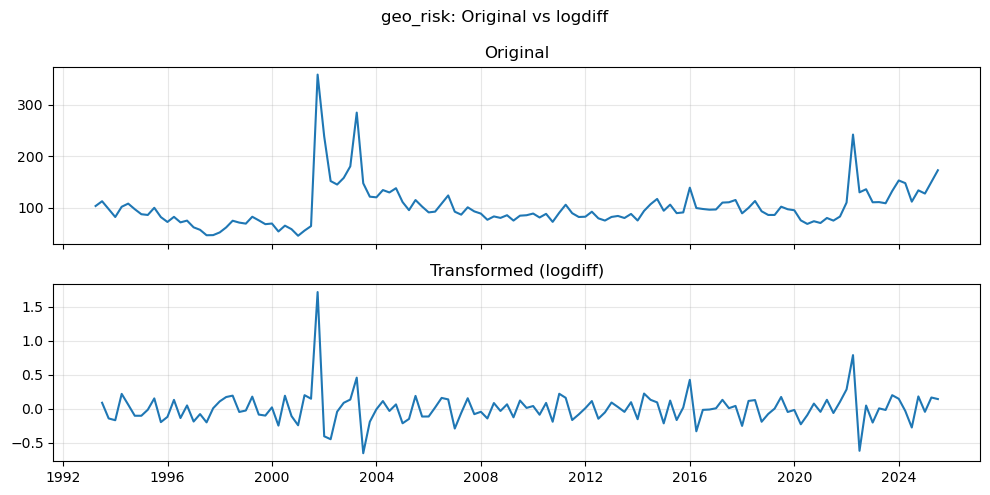


=== geo_risk_china (diff) ===
ADF p-value (original):   0.7504
ADF p-value (transformed):0.0000


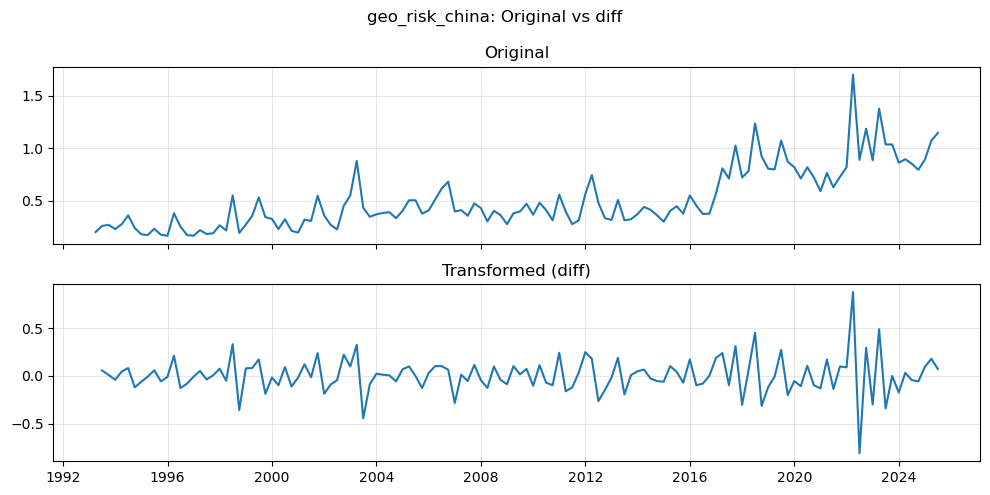


=== geo_risk_usa (logdiff) ===
ADF p-value (original):   0.0631
ADF p-value (transformed):0.0000


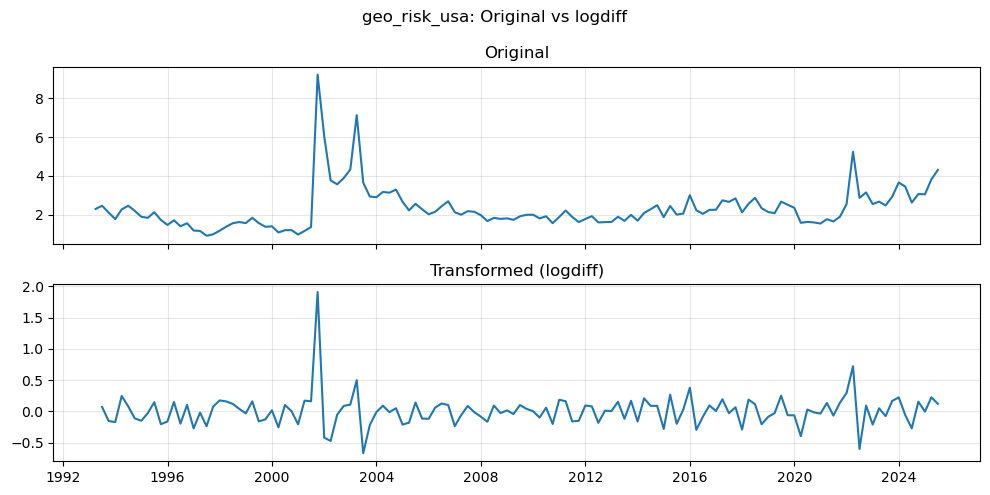


=== eci_growth (diff) ===
ADF p-value (original):   0.1223
ADF p-value (transformed):0.0000


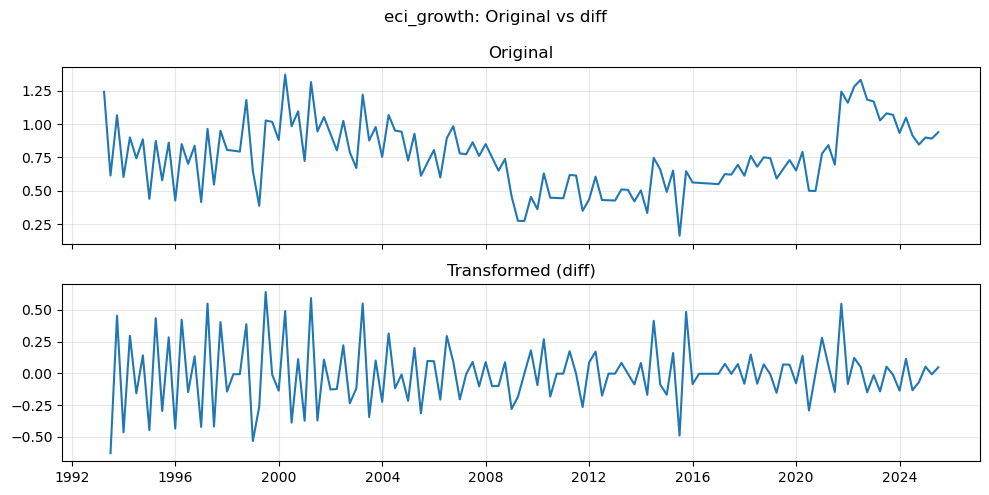


=== inflation_rate (logdiff) ===
ADF p-value (original):   0.0381
ADF p-value (transformed):0.0000


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


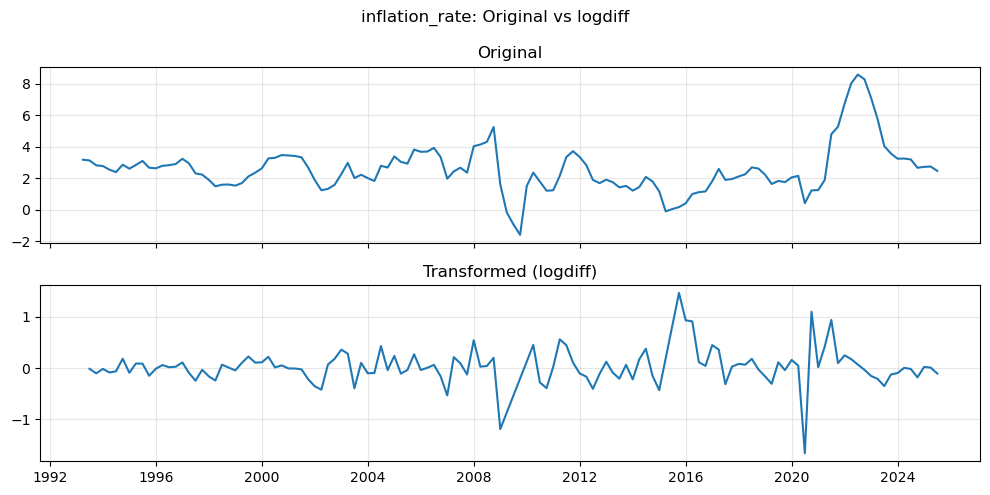

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- 1. Choose which variables to inspect ---
geo_vars_to_check = ["geo_risk", "geo_risk_china", "geo_risk_usa"]
eco_vars_to_check = ["eci_growth", "inflation_rate"]

# --- 2. Define the chosen transformations (from your earlier decisions) ---
best_transforms = {
    "geo_risk": "logdiff",
    "geo_risk_china": "diff",
    "geo_risk_usa": "logdiff",
    "eci_growth": "diff",
    "inflation_rate": "logdiff"
}

def transform_series(series, method):
    if method == "diff":
        return series.diff()
    elif method == "log":
        return np.log(series)
    elif method == "logdiff":
        return np.log(series).diff()
    else:
        return series

def adf_p(series):
    series = series.dropna()
    if len(series) < 10:  # sanity check
        return np.nan
    return adfuller(series)[1]

# --- 3. Plot GEO variables: original vs transformed ---
for col in geo_vars_to_check:
    if col not in geo.columns:
        print(f"⚠️ {col} not found in df_geo, skipping.")
        continue
    
    method = best_transforms.get(col, "none")
    orig = geo[col].astype(float)
    trans = transform_series(orig, method)

    p_orig = adf_p(orig)
    p_trans = adf_p(trans)

    print(f"\n=== {col} ({method}) ===")
    print(f"ADF p-value (original):   {p_orig:.4f}")
    print(f"ADF p-value (transformed):{p_trans:.4f}")

    fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
    fig.suptitle(f"{col}: Original vs {method}", fontsize=12)

    axes[0].plot(orig.index, orig.values)
    axes[0].set_title("Original")
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(trans.dropna().index, trans.dropna().values)
    axes[1].set_title(f"Transformed ({method})")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- 4. Plot ECO variables: original vs transformed ---
for col in eco_vars_to_check:
    if col not in eco.columns:
        print(f"⚠️ {col} not found in df_eco, skipping.")
        continue
    
    method = best_transforms.get(col, "none")
    orig = eco[col].astype(float)
    trans = transform_series(orig, method)

    p_orig = adf_p(orig)
    p_trans = adf_p(trans)

    print(f"\n=== {col} ({method}) ===")
    print(f"ADF p-value (original):   {p_orig:.4f}")
    print(f"ADF p-value (transformed):{p_trans:.4f}")

    fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
    fig.suptitle(f"{col}: Original vs {method}", fontsize=12)

    axes[0].plot(orig.index, orig.values)
    axes[0].set_title("Original")
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(trans.dropna().index, trans.dropna().values)
    axes[1].set_title(f"Transformed ({method})")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Seasonality checks

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


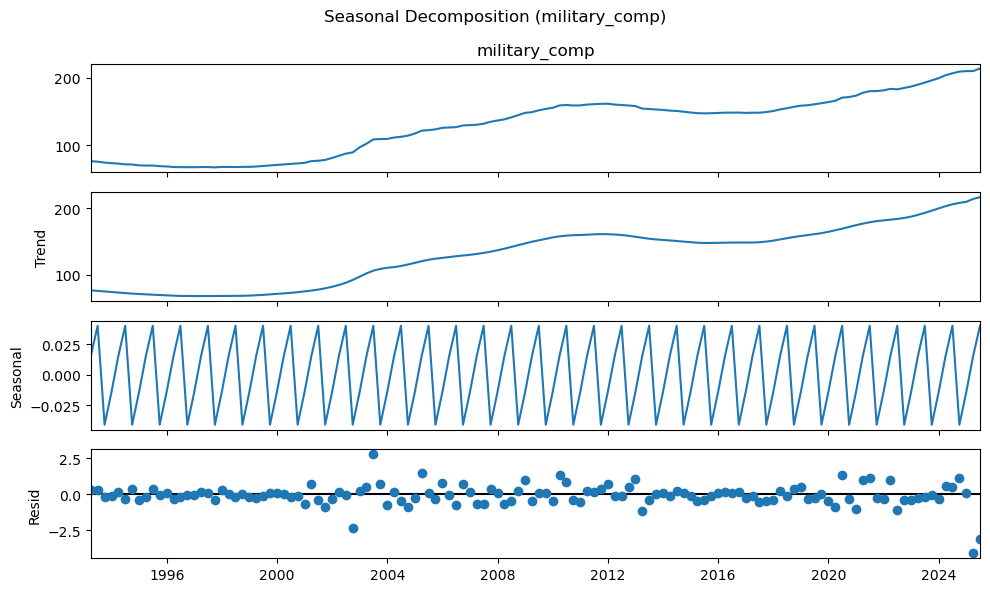

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


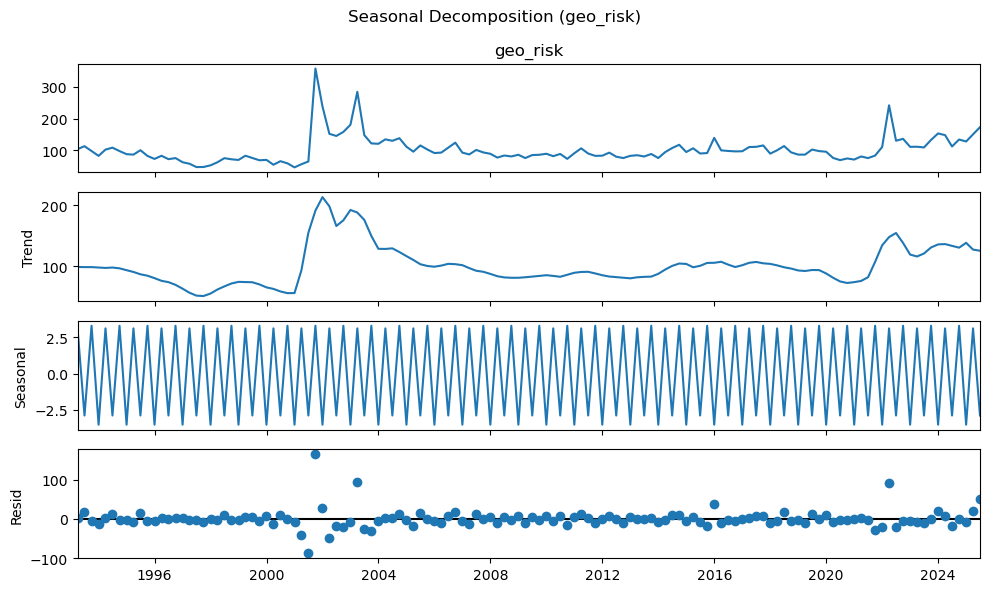

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


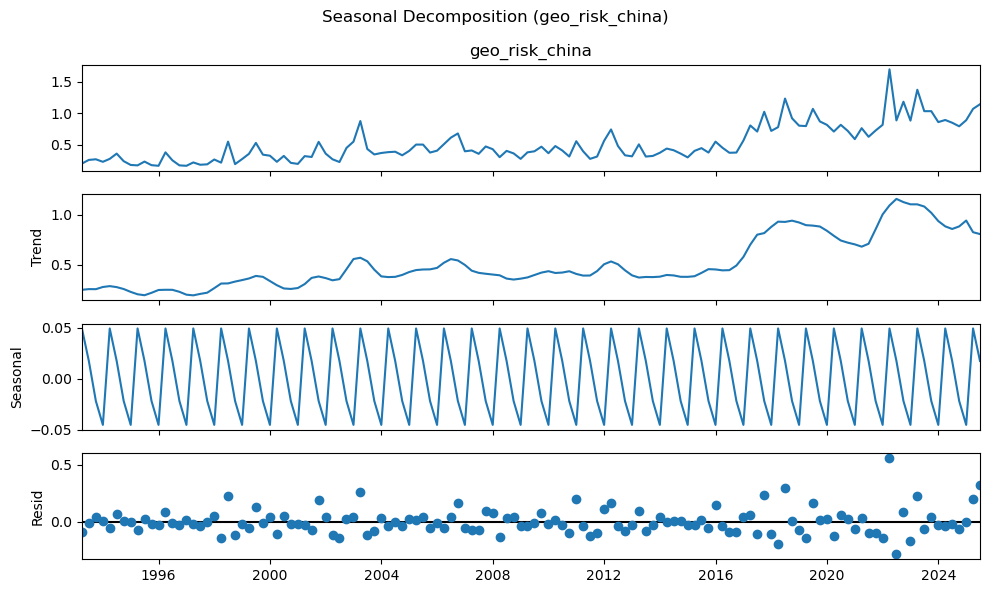

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


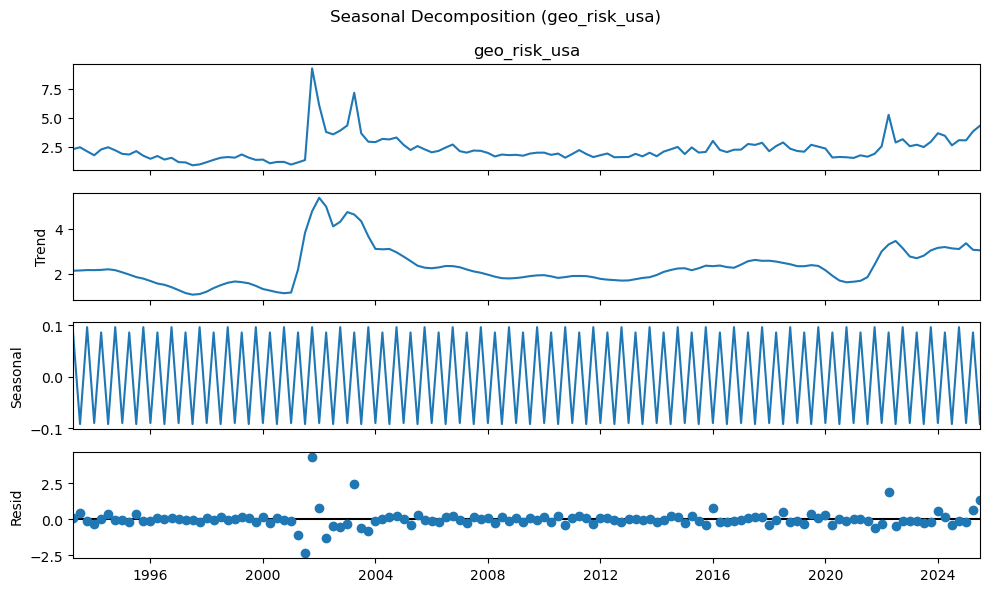

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


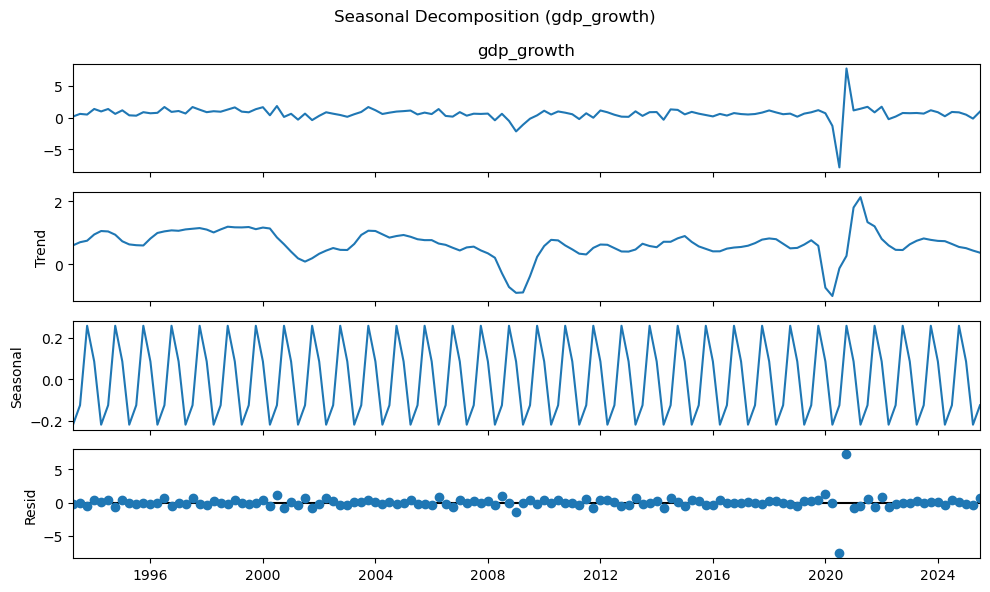

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


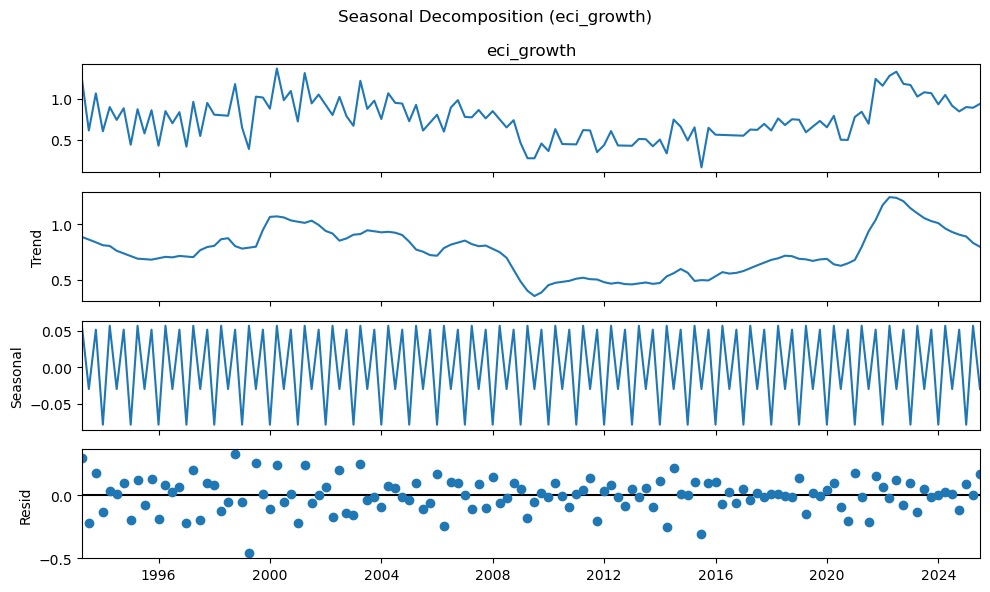

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_84500/2018625739.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s = s.asfreq('Q')


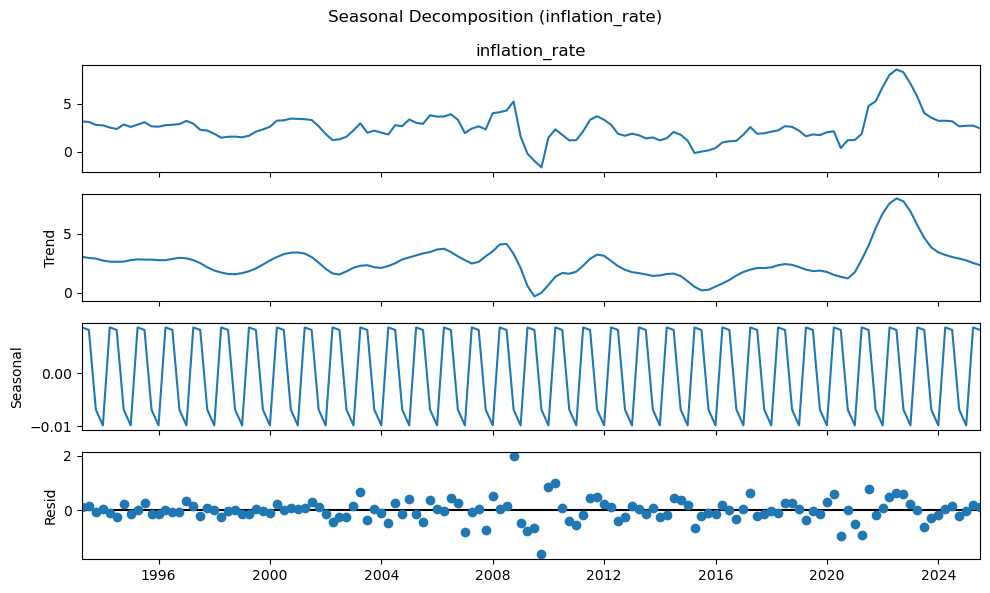

In [47]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# --- Helper to safely decompose and plot ---
def decompose_and_plot(series, name, period=4):
    s = series.dropna().astype(float)
    # Force quarterly frequency if not set
    s = s.asfreq('Q')
    
    if len(s) < period * 4:  # need enough data for a decent decomposition
        print(f"⚠️ Not enough data to decompose {name} (len={len(s)})")
        return
    
    result = seasonal_decompose(s, model='additive', period=period, extrapolate_trend='freq')
    
    fig = result.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f"Seasonal Decomposition ({name})", fontsize=12)
    plt.tight_layout()
    plt.show()

# --- 1. Military compensation ---
decompose_and_plot(comp["military_comp"], "military_comp")

# --- 2. Geopolitical variables ---
geo_vars = ["geo_risk", "geo_risk_china", "geo_risk_usa"]
for col in geo_vars:
    if col in geo.columns:
        decompose_and_plot(geo[col], f"{col}")
    else:
        print(f"⚠️ {col} not found in df_geo")

# --- 3. Economic variables ---
eco_vars = ["gdp_growth", "eci_growth", "inflation_rate"]
for col in eco_vars:
    if col in eco.columns:
        decompose_and_plot(eco[col], f"{col}")
    else:
        print(f"⚠️ {col} not found in df_eco")

In [48]:
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def check_seasonality(series, name):
    """
    Numerical seasonality check for (roughly) quarterly series:
    1) Autocorrelation at lag 4 (quarterly seasonality)
    2) F-test for quarterly dummy variables
    """
    print(f"\n===== Seasonality check: {name} =====")

    # Drop missing and ensure float
    s = series.dropna().astype(float)

    if len(s) < 20:
        print(f"⚠️ Too few observations (n={len(s)}) for a reliable check.")
        return

    # 1️⃣ Autocorrelation at seasonal lags
    acf_lag4 = s.autocorr(lag=4) if len(s) > 4 else np.nan
    print(f"Autocorrelation at lag 4: {acf_lag4:.3f}" if not np.isnan(acf_lag4) else "Not enough data for lag 4")

    if not np.isnan(acf_lag4):
        if abs(acf_lag4) > 0.2:
            print("  → Suggestive seasonal pattern at lag 4 ✅")
        else:
            print("  → No strong seasonal signal at lag 4 ❌")

    # 2️⃣ F-test for quarterly dummies
    # Use periods to get quarter even if dates are not exactly quarter-end
    if not isinstance(s.index, pd.PeriodIndex):
        quarters = s.index.to_period("Q").quarter
    else:
        quarters = s.index.quarter

    df = pd.DataFrame({"y": s.values, "q": quarters})
    dummies = pd.get_dummies(df["q"], prefix="Q", drop_first=True)  # Q2, Q3, Q4

    # Make sure we have variation in quarters
    if dummies.shape[1] == 0:
        print("  → Only one quarter present, cannot test seasonality.")
        return

    X = add_constant(dummies.astype(float).values)  # exog as ndarray
    y = df["y"].astype(float).values               # endog as ndarray

    model = OLS(y, X).fit()

    # Test H0: all quarterly dummies = 0  (no seasonal effect)
    # We exclude the constant (col 0), so we test all remaining columns
    k = X.shape[1]
    R = np.zeros((k - 1, k))
    R[np.arange(k - 1), np.arange(1, k)] = 1  # pick columns 1..k-1
    f_test = model.f_test(R)

    print("\nF-test for quarterly seasonality:")
    print(f"  F-statistic: {float(f_test.fvalue):.3f}")
    print(f"  p-value    : {float(f_test.pvalue):.4f}")

    if f_test.pvalue < 0.05:
        print("  → Significant quarterly effect ✅")
    else:
        print("  → No significant quarterly pattern ❌")


# === Run checks ===

# 1️⃣ Military compensation
check_seasonality(comp["military_comp"], "military_comp")

# 2️⃣ Geopolitical variables
for col in ["geo_risk", "geo_risk_china", "geo_risk_usa"]:
    if col in geo.columns:
        check_seasonality(geo[col], col)
    else:
        print(f"\n⚠️ {col} not found in geo dataset")

# 3️⃣ Economic variables
for col in ["gdp_growth", "eci_growth", "inflation_rate"]:
    if col in eco.columns:
        check_seasonality(eco[col], col)
    else:
        print(f"\n⚠️ {col} not found in eco dataset")


===== Seasonality check: military_comp =====
Autocorrelation at lag 4: 0.992
  → Suggestive seasonal pattern at lag 4 ✅

F-test for quarterly seasonality:
  F-statistic: 0.009
  p-value    : 0.9988
  → No significant quarterly pattern ❌

===== Seasonality check: geo_risk =====
Autocorrelation at lag 4: 0.294
  → Suggestive seasonal pattern at lag 4 ✅

F-test for quarterly seasonality:
  F-statistic: 0.221
  p-value    : 0.8816
  → No significant quarterly pattern ❌

===== Seasonality check: geo_risk_china =====
Autocorrelation at lag 4: 0.749
  → Suggestive seasonal pattern at lag 4 ✅

F-test for quarterly seasonality:
  F-statistic: 0.619
  p-value    : 0.6040
  → No significant quarterly pattern ❌

===== Seasonality check: geo_risk_usa =====
Autocorrelation at lag 4: 0.324
  → Suggestive seasonal pattern at lag 4 ✅

F-test for quarterly seasonality:
  F-statistic: 0.256
  p-value    : 0.8570
  → No significant quarterly pattern ❌

===== Seasonality check: gdp_growth =====
Autocorrel

In [49]:
eco.to_csv("economical_ready_for_modeling_notTransformed.csv", index=True)
geo.to_csv("geopolitical_ready_for_modeling_notTransformed.csv", index=True)
geo=geo_transformed
eco=eco_transformed
eco.to_csv("economical_ready_for_modeling.csv", index=True)
geo.to_csv("geopolitical_ready_for_modeling.csv", index=True)

In [50]:
geo

,military_comp,geo_risk_logdiff,geo_threats,geo_acts,geo_risk_china_diff,geo_risk_russia,geo_risk_usa_logdiff
date,,,,,,,
1993-06-30,75.756,0.085765,131.536667,86.096667,0.058333,0.950000,0.069959
1993-09-30,74.416,-0.145052,108.286667,78.963333,0.010000,0.673333,-0.154601
1993-12-31,73.552,-0.171261,98.430000,55.586667,-0.040000,0.586667,-0.171653
1994-03-31,73.021,0.216371,121.053333,74.873333,0.046667,0.860000,0.246099
1994-06-30,71.829,0.058348,128.893333,76.443333,0.083333,0.663333,0.080155
...,...,...,...,...,...,...,...
2024-06-30,206.338,-0.278325,117.440000,112.526667,-0.043333,1.393333,-0.271390
2024-09-30,208.947,0.178946,128.963333,147.710000,-0.056667,1.453333,0.154694
2024-12-31,209.605,-0.047553,127.356667,133.873333,0.096667,1.793333,-0.004353


In [51]:
eco

,military_comp,gdp_growth,eci_growth_diff,inflation_rate_diff
date,,,,
1993-06-30,75.756,0.582171,-0.628739,-0.048177
1993-09-30,74.416,0.477155,0.453576,-0.307847
1993-12-31,73.552,1.360149,-0.463755,-0.048030
1994-03-31,73.021,0.970363,0.296232,-0.229773
1994-06-30,71.829,1.355183,-0.156608,-0.156933
...,...,...,...,...
2024-06-30,206.338,0.885486,-0.132897,-0.060117
2024-09-30,208.947,0.824778,-0.068759,-0.527033
2024-12-31,209.605,0.459875,0.052848,0.058677


In [52]:
import pandas as pd

# Assuming 'df' is your DataFrame
comp = comp.drop(comp.index[0])
comp.to_csv("Military_Compensation.csv.csv", index=True)

In [53]:
comp

,military_comp
date,
1993-06-30,75.756
1993-09-30,74.416
1993-12-31,73.552
1994-03-31,73.021
1994-06-30,71.829
...,...
2024-06-30,206.338
2024-09-30,208.947
2024-12-31,209.605
